In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('creditcard.csv') 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

C:\Users\Guilherme Caetano\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


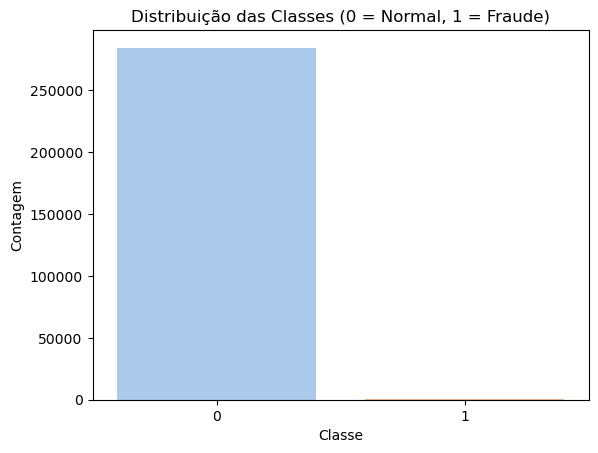

In [8]:
# Distribuição das classes
sns.countplot(df['Class'], palette='pastel')
plt.title('Distribuição das Classes (0 = Normal, 1 = Fraude)')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()


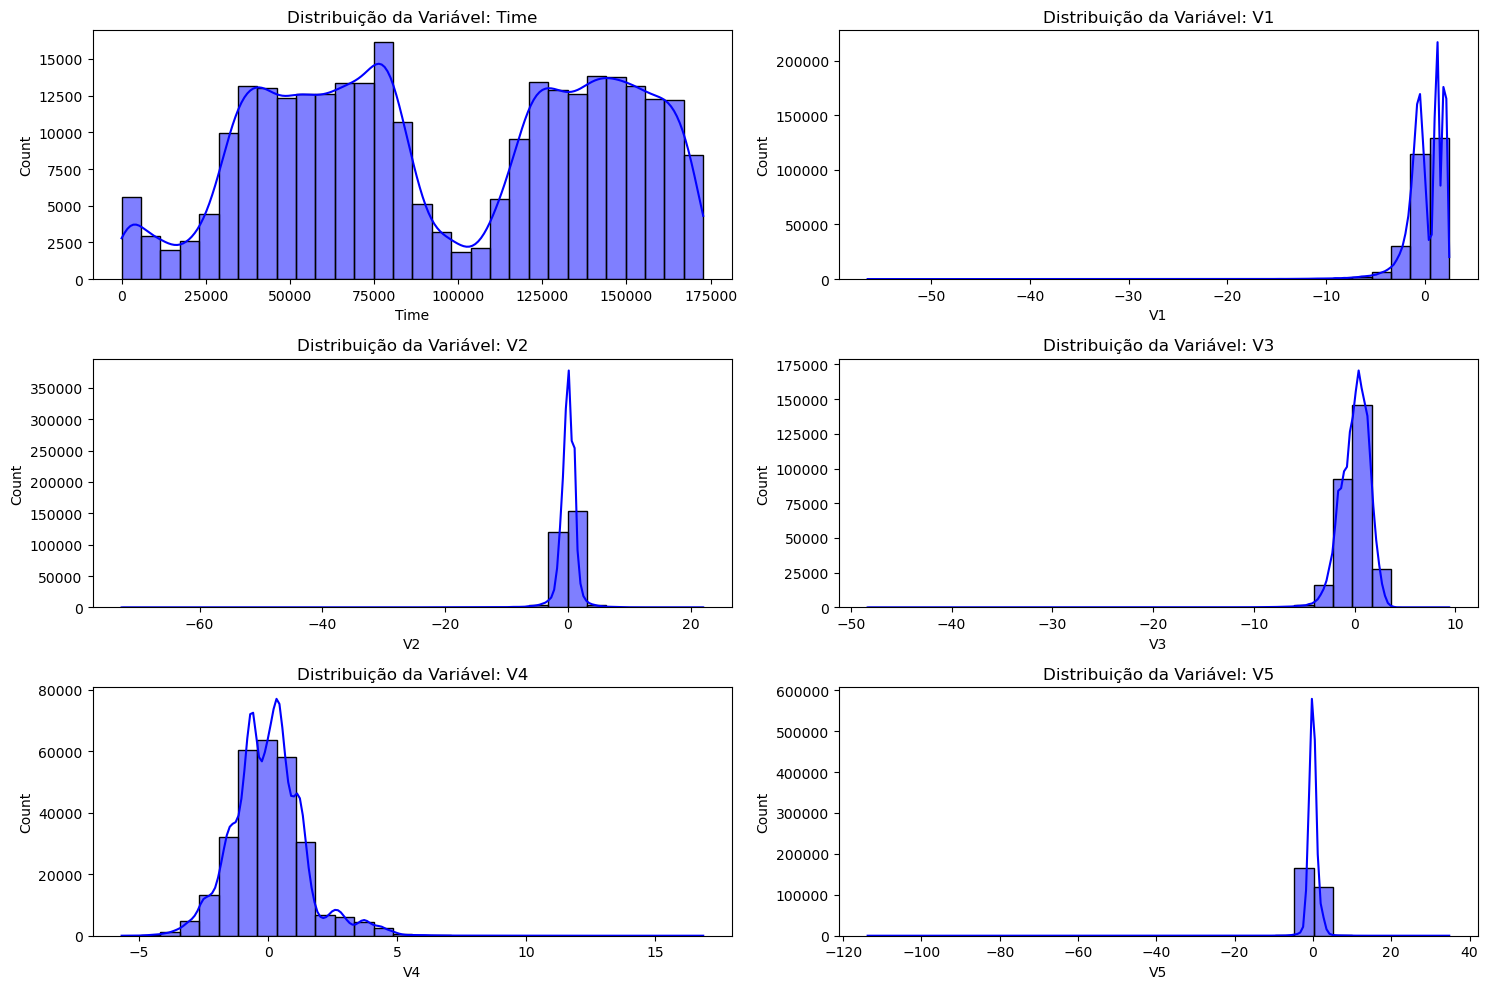

In [10]:
# Distribuição das variáveis numéricas
plt.figure(figsize=(15, 10))
columns_to_plot = df.columns[:6]  
for i, col in enumerate(columns_to_plot):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribuição da Variável: {col}')
plt.tight_layout()
plt.show()

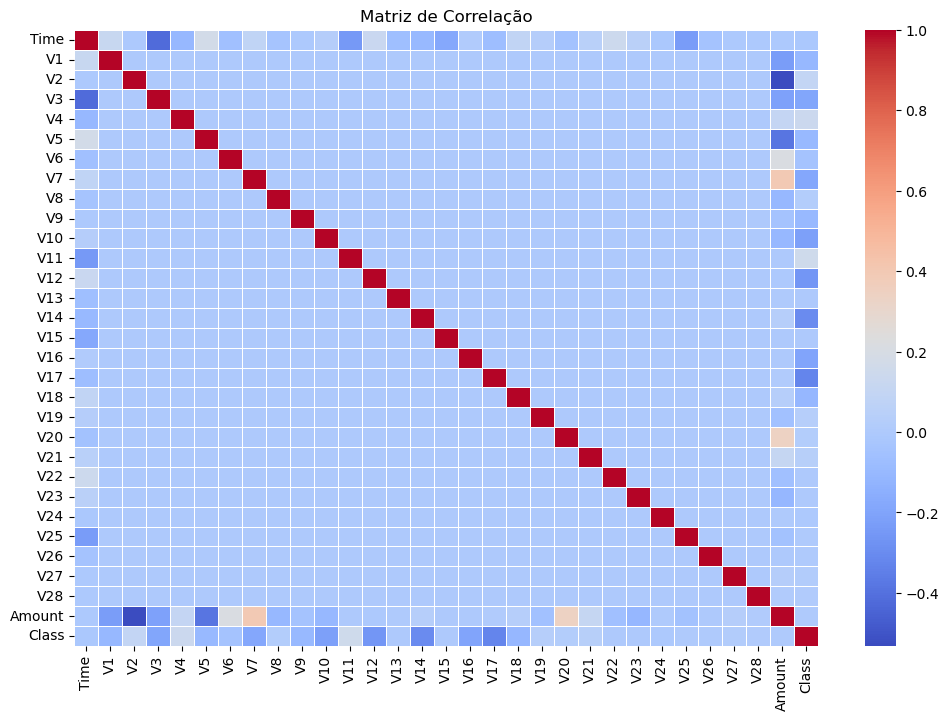

In [12]:
# Análise de correlação
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [15]:
# Comparação entre transações normais e fraudulentas
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

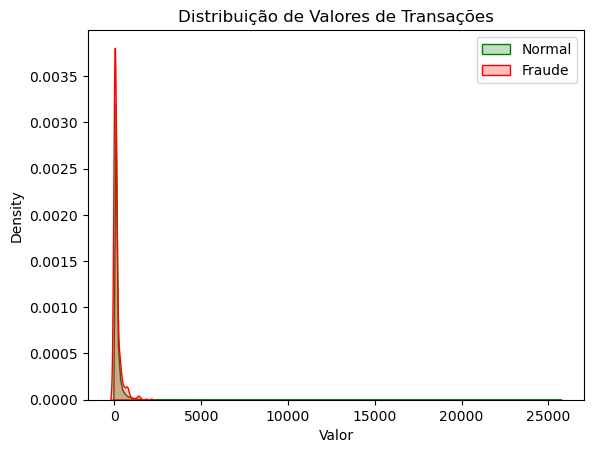

In [16]:
# Comparação da variável Amount entre as classes
sns.kdeplot(normal['Amount'], label='Normal', fill=True, color='green')
sns.kdeplot(fraud['Amount'], label='Fraude', fill=True, color='red')
plt.title('Distribuição de Valores de Transações')
plt.xlabel('Valor')
plt.legend()
plt.show()

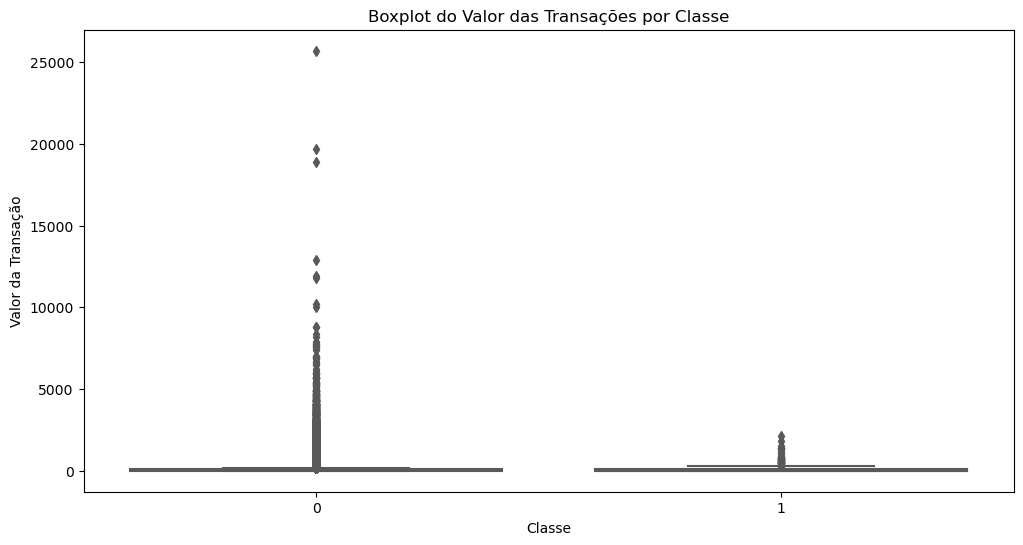

In [17]:
# Boxplot para verificar possíveis outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Class', y='Amount', palette='Set2')
plt.title('Boxplot do Valor das Transações por Classe')
plt.xlabel('Classe')
plt.ylabel('Valor da Transação')
plt.show()

In [20]:
X = df.drop(columns=['Class'])
y = df['Class']

In [21]:
# Dividindo os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
# Verificando distribuição inicial das classes
print("Distribuição das classes no conjunto de treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição das classes no conjunto de teste:")
print(y_test.value_counts(normalize=True))

Distribuição das classes no conjunto de treino:
0    0.998271
1    0.001729
Name: Class, dtype: float64

Distribuição das classes no conjunto de teste:
0    0.99828
1    0.00172
Name: Class, dtype: float64


In [24]:
# 4. Balanceamento das classes no conjunto de treino
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nDistribuição das classes após balanceamento com SMOTE (treino):")
print(pd.Series(y_train_resampled).value_counts(normalize=True))


Distribuição das classes após balanceamento com SMOTE (treino):
0    0.5
1    0.5
Name: Class, dtype: float64


In [27]:
# Análise Exploratória (EDA) no conjunto de treino

print("\nEstatísticas descritivas do conjunto de treino:")
print(X_train_resampled.describe())


Estatísticas descritivas do conjunto de treino:
                Time             V1             V2             V3  \
count  454902.000000  454902.000000  454902.000000  454902.000000   
mean    88882.914610      -2.432845       1.873525      -3.638726   
std     48129.849638       5.446960       3.596824       6.185646   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     47606.133264      -2.942659      -0.103729      -5.233908   
50%     82200.500000      -0.800141       1.015031      -1.533471   
75%    135022.000000       0.836861       2.822069       0.271068   
max    172792.000000       2.451888      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  454902.000000  454902.000000  454902.000000  454902.000000   
mean        2.335936      -1.610781      -0.714362      -2.878924   
std         3.156074       4.126383       1.684866       5.667593   
min        -5.683171    -113.743307     -26.160506   

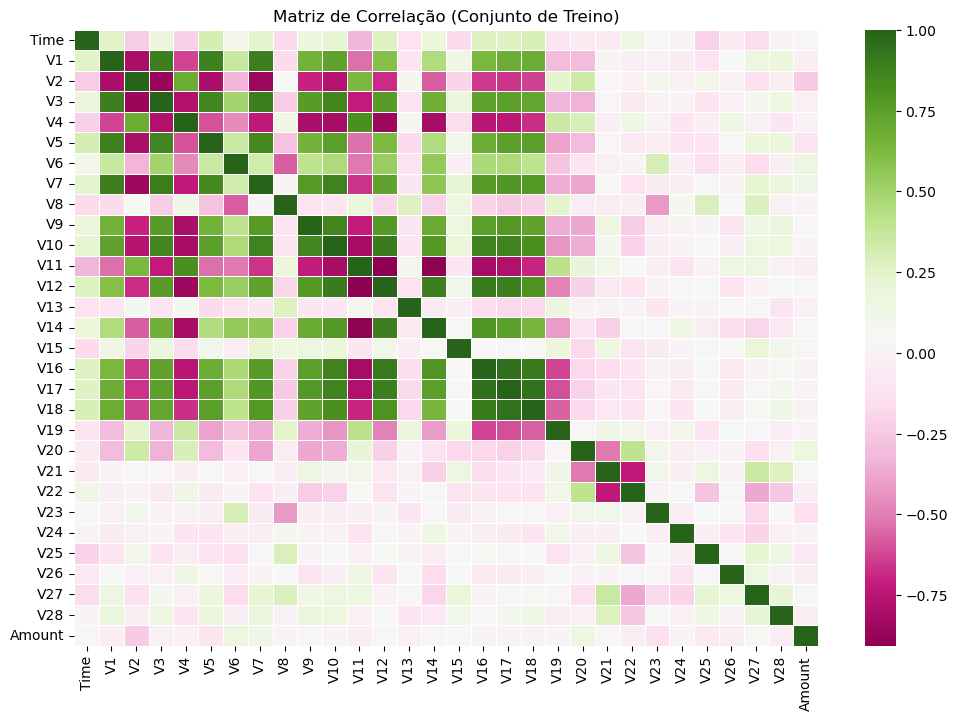

In [29]:
# Correlação entre as variáveis (treino)
corr_matrix = pd.DataFrame(X_train_resampled).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='PRGn', annot=False, linewidths=0.5)
plt.title('Matriz de Correlação (Conjunto de Treino)')
plt.show()

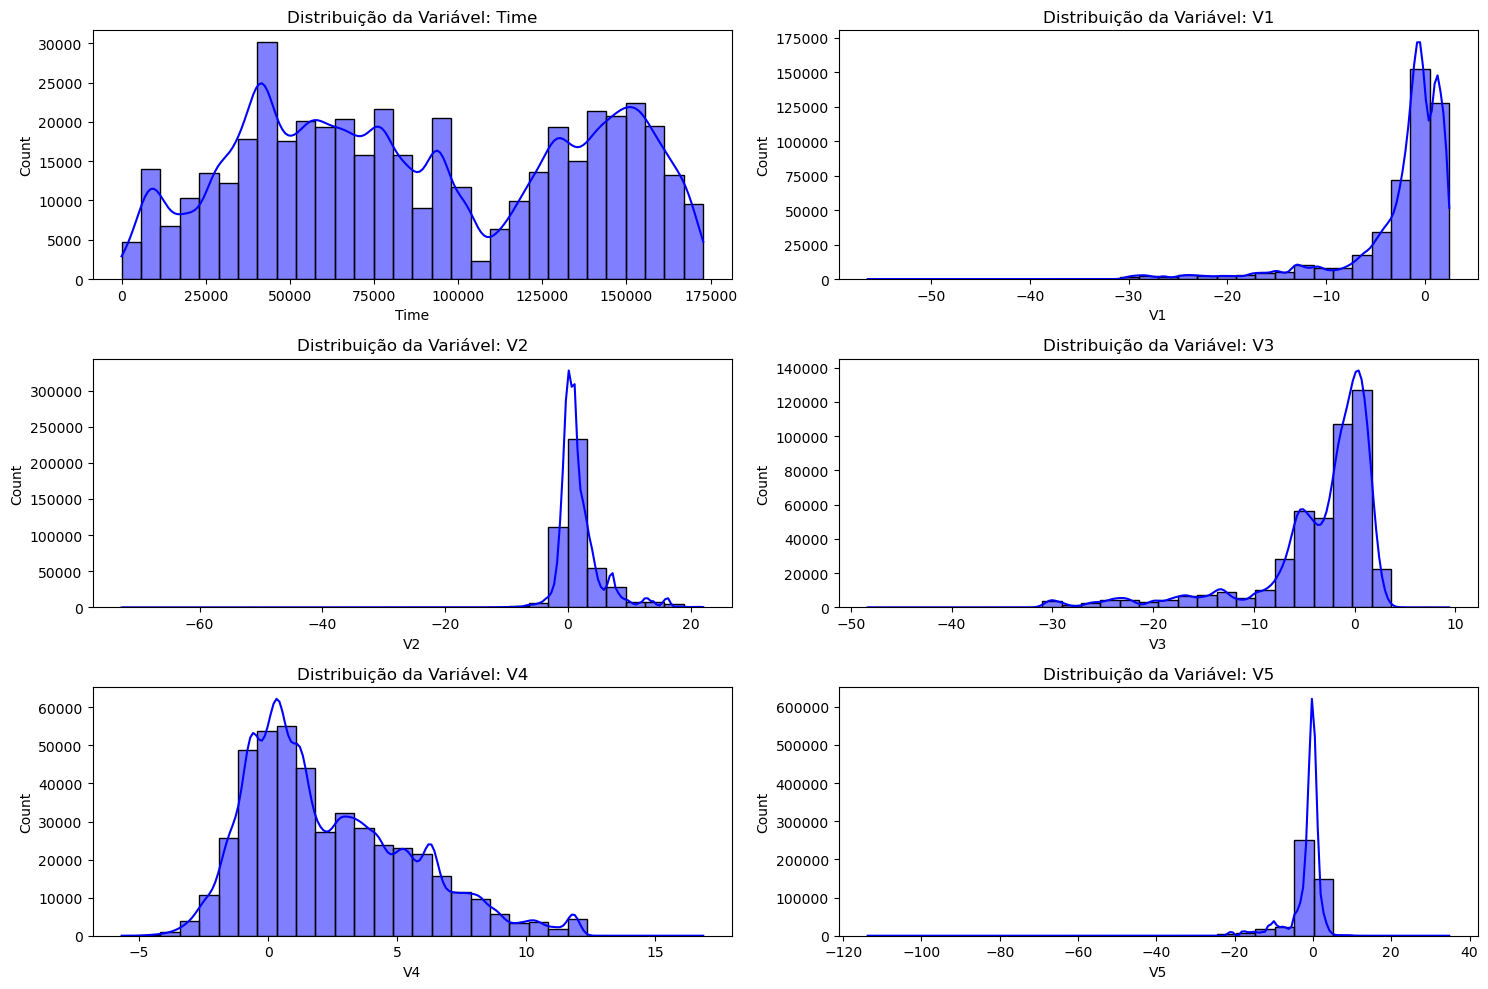

In [30]:
# Distribuição de variáveis no conjunto de treino
plt.figure(figsize=(15, 10))
columns_to_plot = X_train_resampled.columns[:6]  # Plotando apenas 6 primeiras variáveis para exemplo
for i, col in enumerate(columns_to_plot):
    plt.subplot(3, 2, i + 1)
    sns.histplot(X_train_resampled[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribuição da Variável: {col}')
plt.tight_layout()
plt.show()

In [32]:
train = pd.concat([pd.DataFrame(X_train_resampled), pd.Series(y_train_resampled, name='Class')], axis=1)
test = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

In [33]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)